In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [23]:
inform_data_updated = pd.read_excel('/Users/hkkkkk/Downloads/RH_INFORM_data_lagged.xlsx')
people_in_need_ratio_2022 = pd.read_csv('/Users/hkkkkk/Downloads/People_in_Need_Ratio_2022.csv')

In [114]:
# Descriptive 
inform_trend_data = inform_data_updated[inform_data_updated['Indicator Type'] == 'INORM Index'][['Country', 'SurveyYear', 'IndicatorScore']]
descriptive_stats = inform_trend_data.groupby('SurveyYear')['IndicatorScore'].describe()
descriptive_stats


,count,mean,std,min,25%,50%,75%,max
SurveyYear,,,,,,,,
2017,1399.0,5.080257,3.450464,0.0,1.7,5.4,8.1,10.0
2019,1340.0,5.129611,3.433099,0.0,1.9,5.6,8.1,10.0
2020,2592.0,5.375888,3.482295,0.0,2.1,6.0,8.7,10.0
2021,1520.0,4.816894,3.352133,0.0,1.5,5.1,7.8,10.0
2022,741.0,4.848651,3.452970,0.0,1.0,5.3,7.7,10.0


/var/folders/l7/089mvfjn0xl6__n0sl_6w6780000gn/T/ipykernel_12248/3109720447.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


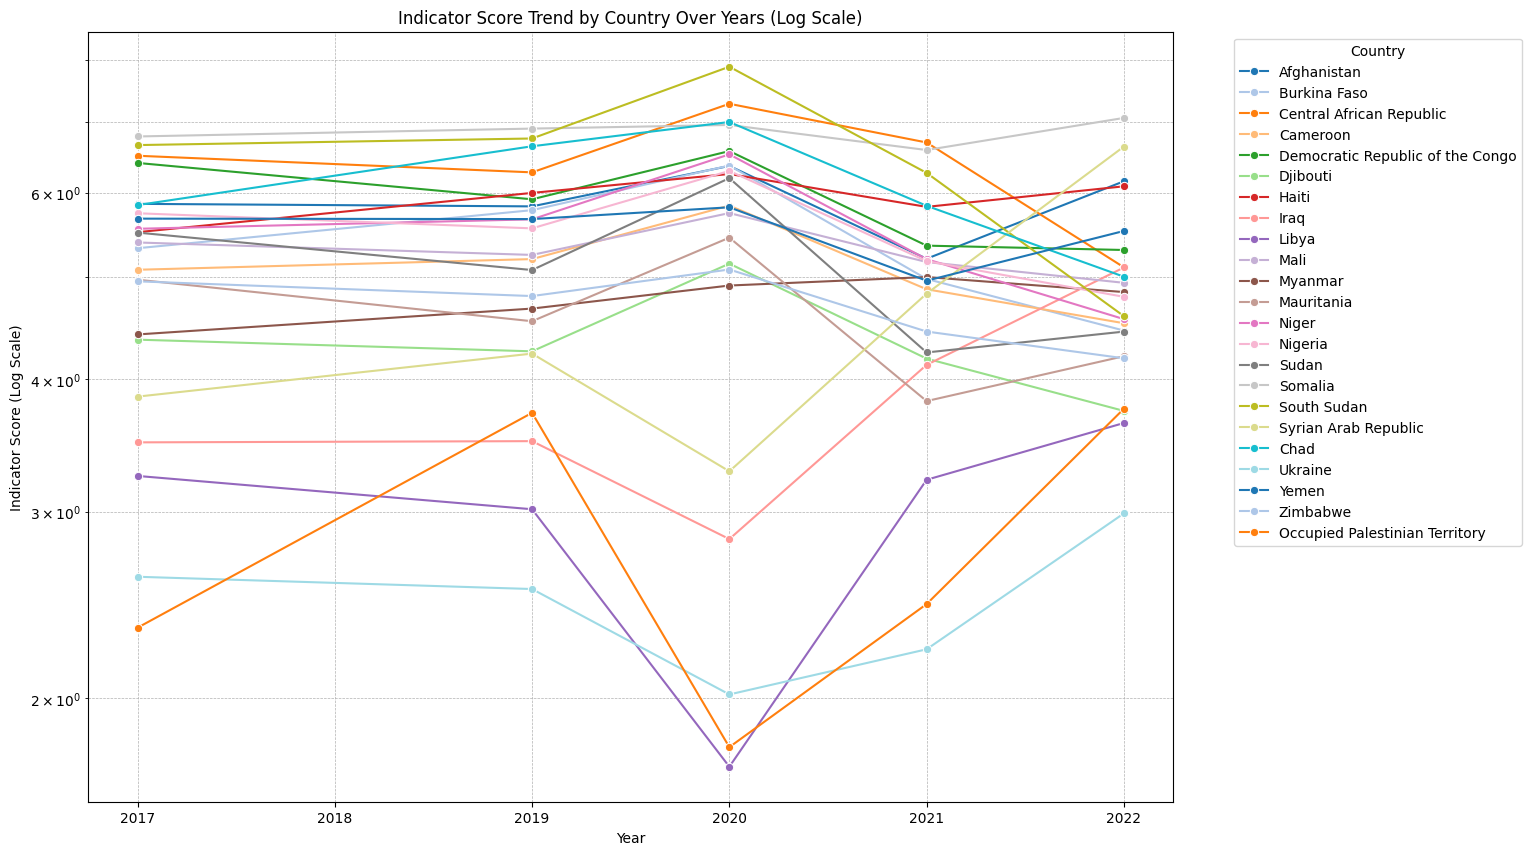

In [103]:
# Change over time 
plt.figure(figsize=(14, 10))

sns.lineplot(
    data=inform_trend_data,
    x='SurveyYear',
    y='IndicatorScore',
    hue='Country',
    marker='o',
    palette='tab20',
    legend='brief',
    ci=None 
)
plt.yscale('log')

plt.xlabel('Year')
plt.ylabel('Indicator Score (Log Scale)')
plt.title('Indicator Score Trend by Country Over Years (Log Scale)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


/var/folders/l7/089mvfjn0xl6__n0sl_6w6780000gn/T/ipykernel_12248/1016342961.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


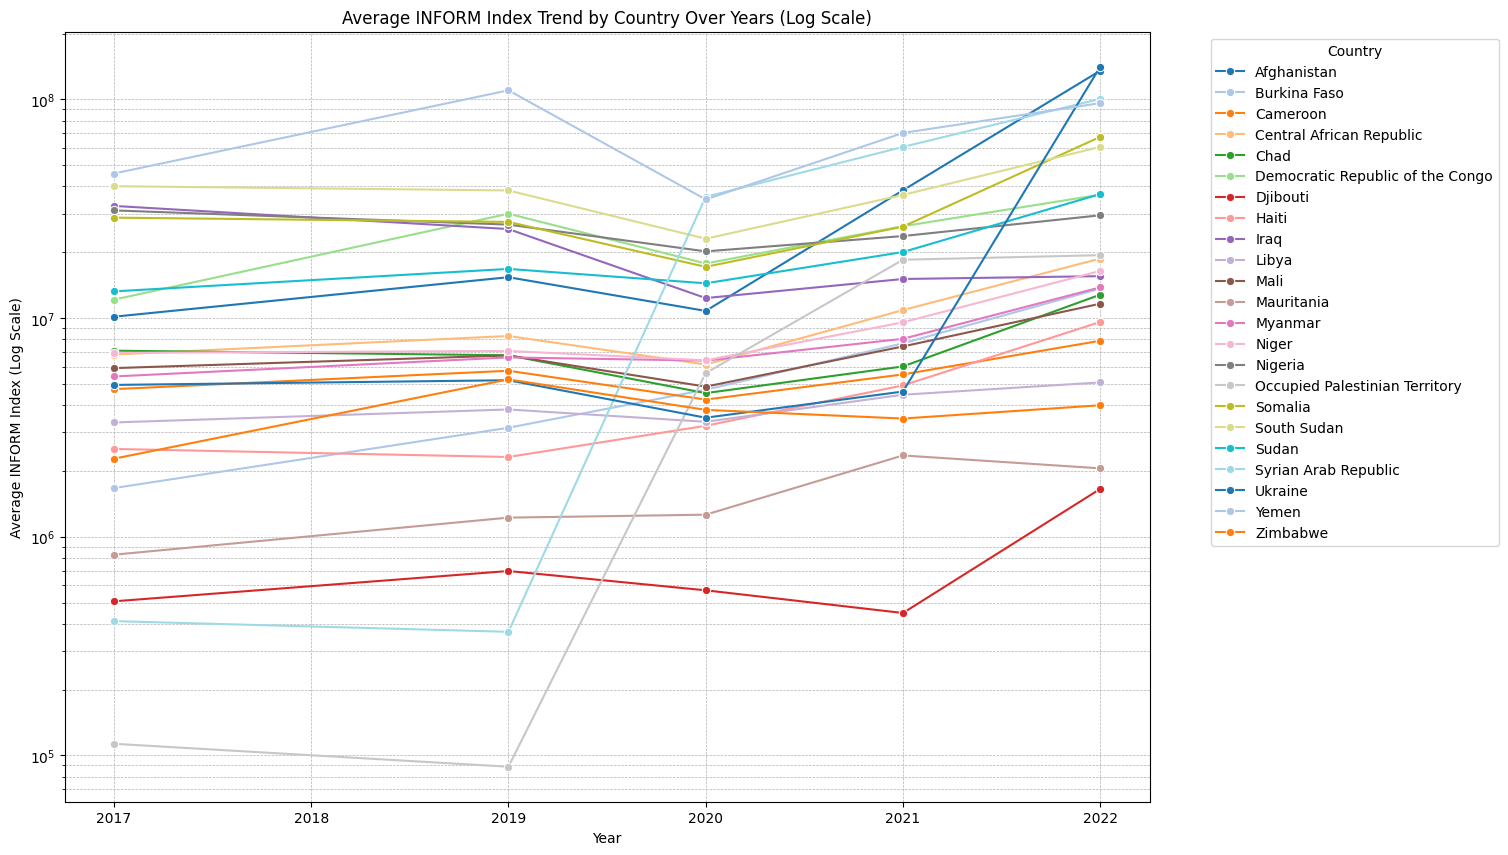

In [91]:
# Generate a line plot using the average INFORM Index for each country over time
plt.figure(figsize=(14, 10))

sns.lineplot(
    data=inform_data_updated.groupby(['Country', 'SurveyYear'])['IndicatorScore'].mean().reset_index(),
    x='SurveyYear',
    y='IndicatorScore',
    hue='Country',
    marker='o',
    palette='tab20',
    legend='brief',
    ci=None
)

plt.yscale('log')

plt.xlabel('Year')
plt.ylabel('Average INFORM Index (Log Scale)')
plt.title('Average INFORM Index Trend by Country Over Years (Log Scale)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [113]:
# 2022 INORM Average - Lagged Year 0 
inform_data_2022_avg = (
    inform_data_updated[inform_data_updated['SurveyYear'] == 2022]
    .groupby('Country')['IndicatorScore']
    .mean()
    .reset_index()
    .rename(columns={'IndicatorScore': 'Avg_IndicatorScore'})
)

merged_data_avg = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2022_avg,
    on='Country',
    how='inner'
)

merged_data_avg['Avg_IndicatorScore_Scaled'] = merged_data_avg['Avg_IndicatorScore'] / 1e6

cleaned_data_avg = merged_data_avg.replace([np.inf, -np.inf], np.nan).dropna()

# Regression
X = sm.add_constant(cleaned_data_avg['Avg_IndicatorScore_Scaled'])
y = cleaned_data_avg['People_in_Need_Ratio']
model_avg = sm.OLS(y, X).fit()
regression_summary_avg = model_avg.summary()

print(regression_summary_avg)


                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.455
Model:                              OLS   Adj. R-squared:                  0.418
Method:                   Least Squares   F-statistic:                     12.50
Date:                  Wed, 12 Feb 2025   Prob (F-statistic):            0.00299
Time:                          01:21:36   Log-Likelihood:                 6.4005
No. Observations:                    17   AIC:                            -8.801
Df Residuals:                        15   BIC:                            -7.135
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

/Users/hkkkkk/myenv311/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


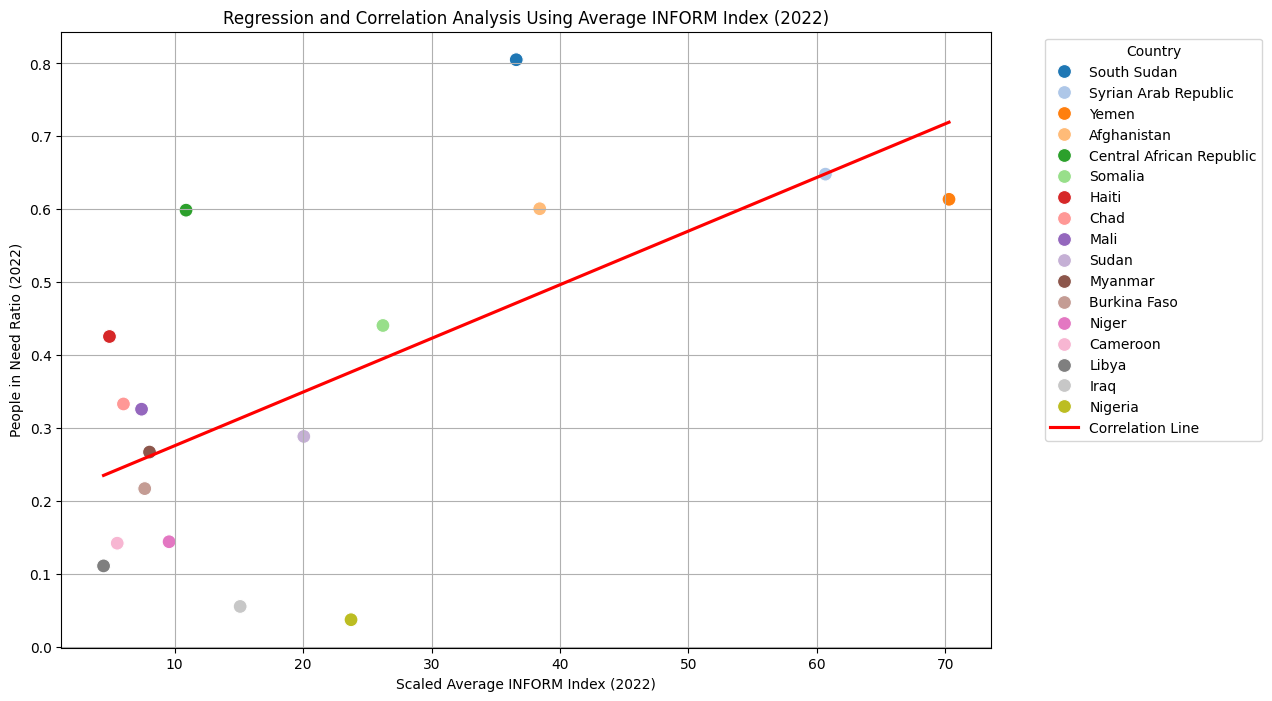

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

sns.regplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label=f'Correlation Line',
    ci=None 
)

plt.xlabel('Scaled Average INFORM Index (2022)')
plt.ylabel('People in Need Ratio (2022)')
plt.title('Regression and Correlation Analysis Using Average INFORM Index (2022)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [105]:
# 2021 INORM Average - Lagged Year 1
inform_data_2021_avg = (
    inform_data_updated[inform_data_updated['SurveyYear'] == 2021]
    .groupby('Country')['IndicatorScore']
    .mean()
    .reset_index()
    .rename(columns={'IndicatorScore': 'Avg_IndicatorScore'})
)

merged_data_avg = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2021_avg,
    on='Country',
    how='inner'
)

merged_data_avg['Avg_IndicatorScore_Scaled'] = merged_data_avg['Avg_IndicatorScore'] / 1e6

cleaned_data_avg = merged_data_avg.replace([np.inf, -np.inf], np.nan).dropna()

# Regression
X = sm.add_constant(cleaned_data_avg['Avg_IndicatorScore_Scaled'])
y = cleaned_data_avg['People_in_Need_Ratio']
model_avg = sm.OLS(y, X).fit()
regression_summary_avg = model_avg.summary()

print(regression_summary_avg)

                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.401
Model:                              OLS   Adj. R-squared:                  0.362
Method:                   Least Squares   F-statistic:                     10.06
Date:                  Wed, 12 Feb 2025   Prob (F-statistic):            0.00632
Time:                          00:44:53   Log-Likelihood:                 5.6103
No. Observations:                    17   AIC:                            -7.221
Df Residuals:                        15   BIC:                            -5.554
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

/Users/hkkkkk/myenv311/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


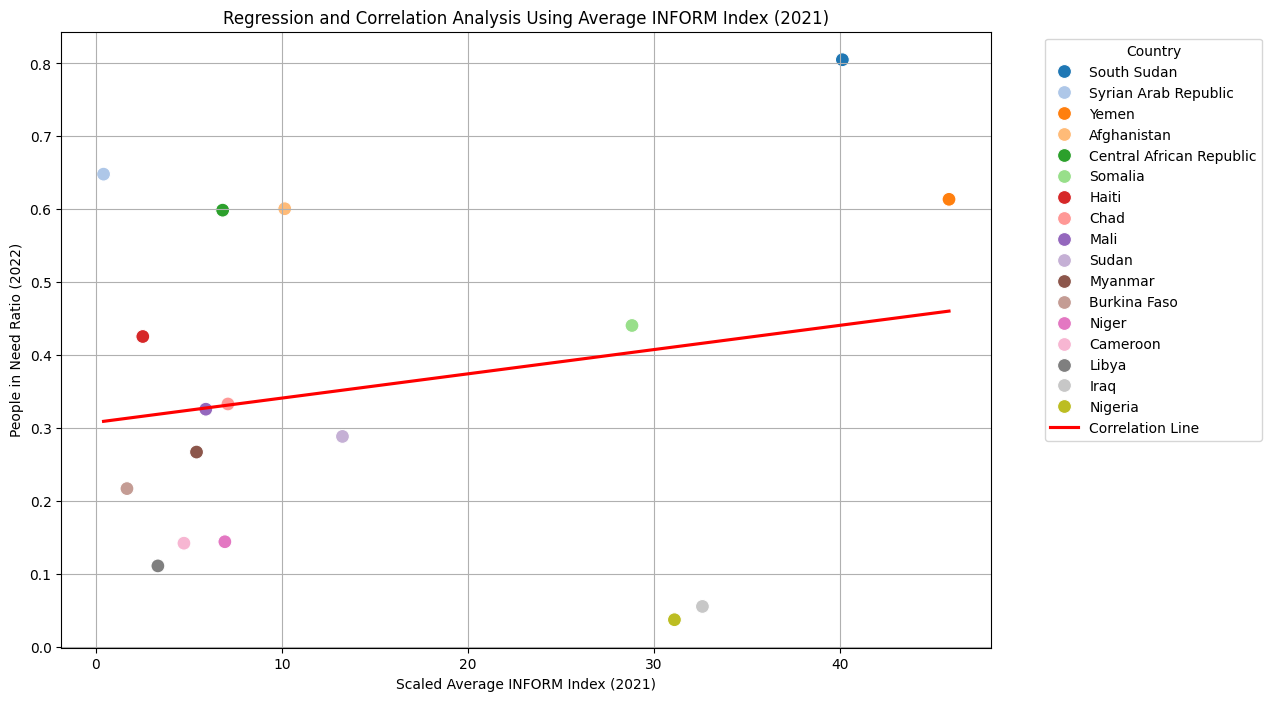

In [104]:
# 2021 Plot 
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

sns.regplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label=f'Correlation Line',
    ci=None
)

plt.xlabel('Scaled Average INFORM Index (2021)')
plt.ylabel('People in Need Ratio (2022)')
plt.title('Regression and Correlation Analysis Using Average INFORM Index (2021)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [112]:
# 2020 INORM Average - Lagged Year 2 
inform_data_2020_avg = (
    inform_data_updated[inform_data_updated['SurveyYear'] == 2020]
    .groupby('Country')['IndicatorScore']
    .mean()
    .reset_index()
    .rename(columns={'IndicatorScore': 'Avg_IndicatorScore'})
)

merged_data_avg = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2020_avg,
    on='Country',
    how='inner'
)

merged_data_avg['Avg_IndicatorScore_Scaled'] = merged_data_avg['Avg_IndicatorScore'] / 1e6

cleaned_data_avg = merged_data_avg.replace([np.inf, -np.inf], np.nan).dropna()

# Regression
X = sm.add_constant(cleaned_data_avg['Avg_IndicatorScore_Scaled'])
y = cleaned_data_avg['People_in_Need_Ratio']
model_avg = sm.OLS(y, X).fit()
regression_summary_avg = model_avg.summary()

print(regression_summary_avg)

                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.259
Model:                              OLS   Adj. R-squared:                  0.210
Method:                   Least Squares   F-statistic:                     5.245
Date:                  Wed, 12 Feb 2025   Prob (F-statistic):             0.0369
Time:                          01:20:36   Log-Likelihood:                 3.7961
No. Observations:                    17   AIC:                            -3.592
Df Residuals:                        15   BIC:                            -1.926
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

/Users/hkkkkk/myenv311/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


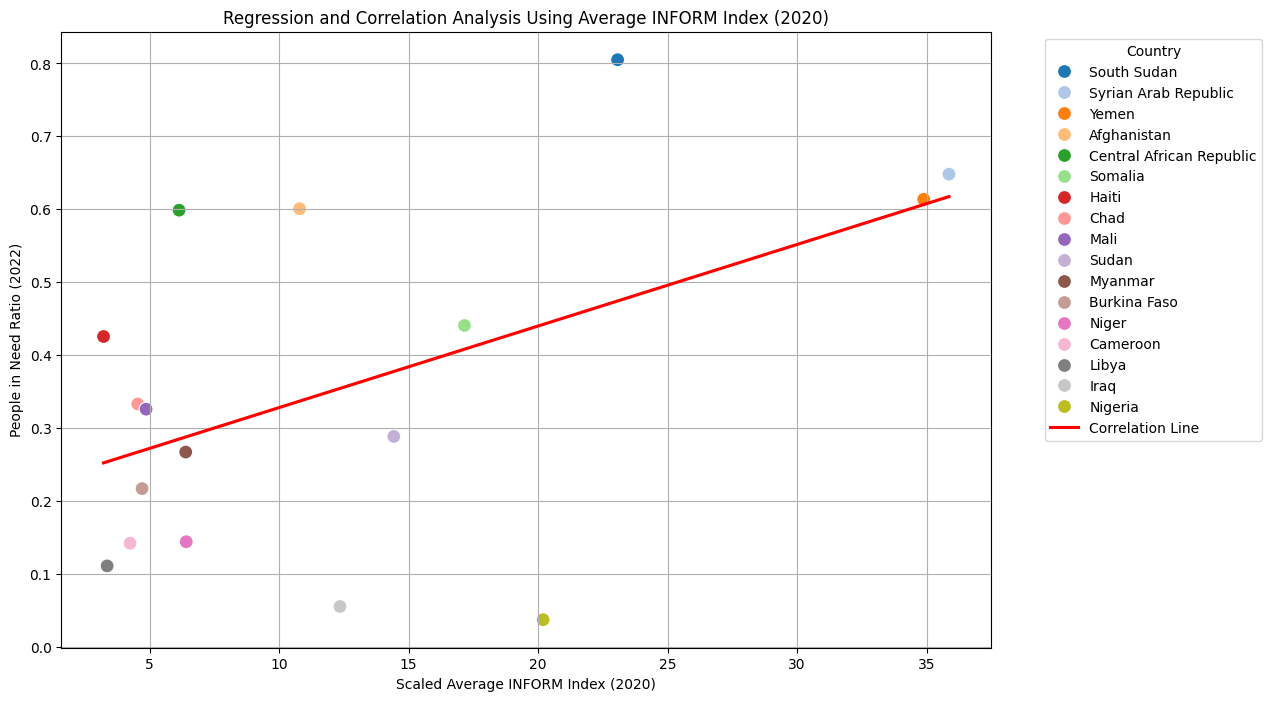

In [107]:
# 2020 Plot 
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

sns.regplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label=f'Correlation Line',
    ci=None
)

plt.xlabel('Scaled Average INFORM Index (2020)')
plt.ylabel('People in Need Ratio (2022)')
plt.title('Regression and Correlation Analysis Using Average INFORM Index (2020)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [108]:
# 2019 INORM Average - Lagged Year 3 
inform_data_2019_avg = (
    inform_data_updated[inform_data_updated['SurveyYear'] == 2019]
    .groupby('Country')['IndicatorScore']
    .mean()
    .reset_index()
    .rename(columns={'IndicatorScore': 'Avg_IndicatorScore'})
)

merged_data_avg = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2019_avg,
    on='Country',
    how='inner'
)

merged_data_avg['Avg_IndicatorScore_Scaled'] = merged_data_avg['Avg_IndicatorScore'] / 1e6

cleaned_data_avg = merged_data_avg.replace([np.inf, -np.inf], np.nan).dropna()

# Regression
X = sm.add_constant(cleaned_data_avg['Avg_IndicatorScore_Scaled'])
y = cleaned_data_avg['People_in_Need_Ratio']
model_avg = sm.OLS(y, X).fit()
regression_summary_avg = model_avg.summary()

print(regression_summary_avg)

                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.107
Model:                              OLS   Adj. R-squared:                  0.047
Method:                   Least Squares   F-statistic:                     1.789
Date:                  Wed, 12 Feb 2025   Prob (F-statistic):              0.201
Time:                          01:06:08   Log-Likelihood:                 2.2052
No. Observations:                    17   AIC:                           -0.4105
Df Residuals:                        15   BIC:                             1.256
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

/Users/hkkkkk/myenv311/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


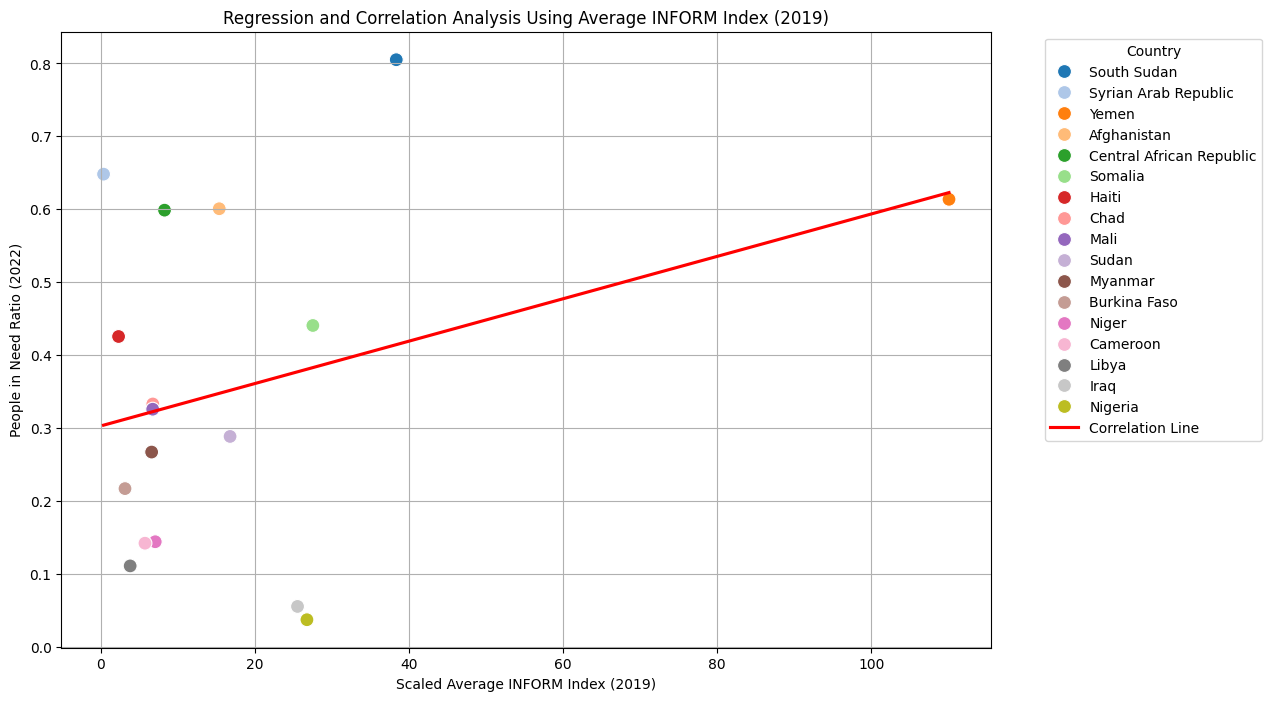

In [109]:
# 2019 Plot 
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

sns.regplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label=f'Correlation Line',
    ci=None
)

plt.xlabel('Scaled Average INFORM Index (2019)')
plt.ylabel('People in Need Ratio (2022)')
plt.title('Regression and Correlation Analysis Using Average INFORM Index (2019)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [110]:
# 2017 INORM Average - Lagged Year 5 
inform_data_2017_avg = (
    inform_data_updated[inform_data_updated['SurveyYear'] == 2017]
    .groupby('Country')['IndicatorScore']
    .mean()
    .reset_index()
    .rename(columns={'IndicatorScore': 'Avg_IndicatorScore'})
)

merged_data_avg = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2017_avg,
    on='Country',
    how='inner'
)

merged_data_avg['Avg_IndicatorScore_Scaled'] = merged_data_avg['Avg_IndicatorScore'] / 1e6

cleaned_data_avg = merged_data_avg.replace([np.inf, -np.inf], np.nan).dropna()

# Regression
X = sm.add_constant(cleaned_data_avg['Avg_IndicatorScore_Scaled'])
y = cleaned_data_avg['People_in_Need_Ratio']
model_avg = sm.OLS(y, X).fit()
regression_summary_avg = model_avg.summary()

print(regression_summary_avg)

                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.045
Model:                              OLS   Adj. R-squared:                 -0.018
Method:                   Least Squares   F-statistic:                    0.7120
Date:                  Wed, 12 Feb 2025   Prob (F-statistic):              0.412
Time:                          01:10:25   Log-Likelihood:                 1.6416
No. Observations:                    17   AIC:                            0.7168
Df Residuals:                        15   BIC:                             2.383
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

/Users/hkkkkk/myenv311/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


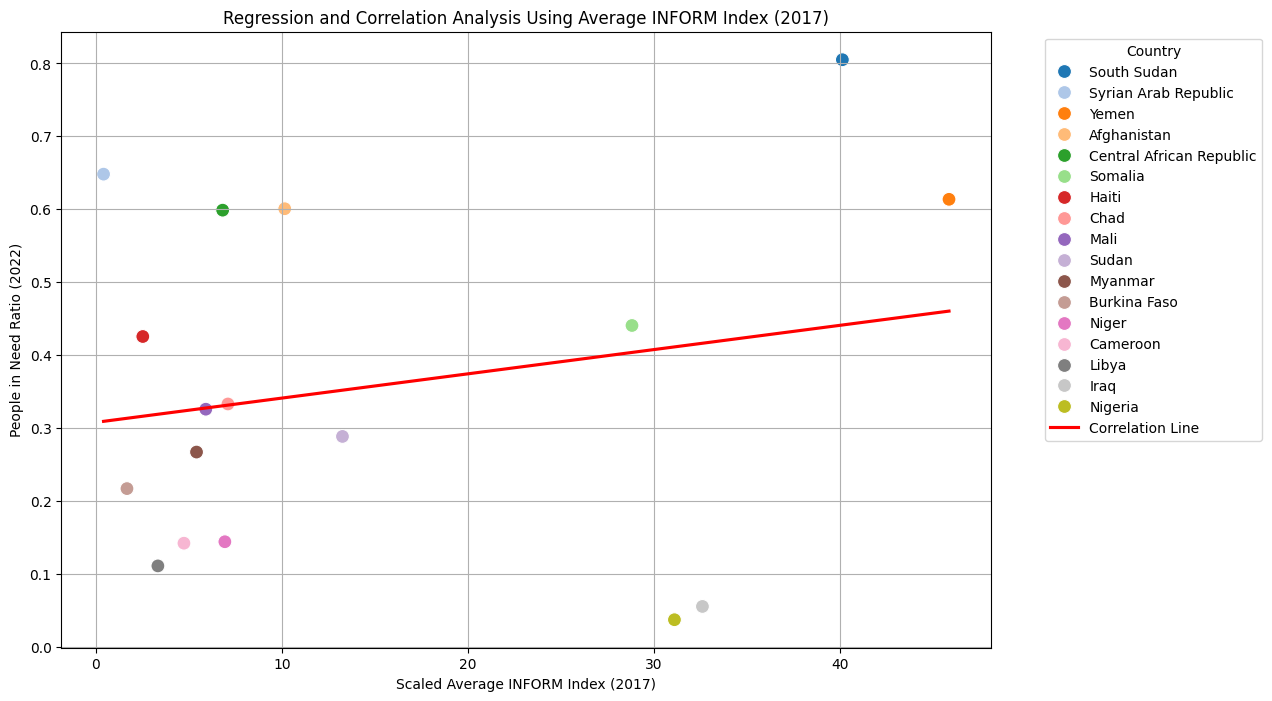

In [111]:
# 2017 Plot 
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

sns.regplot(
    data=cleaned_data_avg,
    x='Avg_IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label=f'Correlation Line',
    ci=None
)

plt.xlabel('Scaled Average INFORM Index (2017)')
plt.ylabel('People in Need Ratio (2022)')
plt.title('Regression and Correlation Analysis Using Average INFORM Index (2017)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:


# Filter INFORM data for the year 2020
inform_data_2020 = inform_data_updated[inform_data_updated['SurveyYear'] == 2020]

# Merge with the 2022 People in Need ratio data
merged_data_2020 = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2020[['Country', 'IndicatorScore']],
    on='Country',
    how='inner'
)

# Handle outliers and scale the data
merged_data_2020['IndicatorScore_Scaled'] = merged_data_2020['IndicatorScore'] / 1e6
cleaned_data_2020 = merged_data_2020.replace([np.inf, -np.inf], np.nan).dropna()

# Regression analysis
X = sm.add_constant(cleaned_data_2020['IndicatorScore_Scaled'])
y = cleaned_data_2020['People_in_Need_Ratio']
model = sm.OLS(y, X).fit()
regression_summary_2020 = model.summary()

# Print the regression summary
print(regression_summary_2020)

# Perform correlation analysis
pearson_corr_2020, pearson_p_value_2020 = pearsonr(
    cleaned_data_2020['IndicatorScore_Scaled'],
    cleaned_data_2020['People_in_Need_Ratio']
)

# Print the correlation result
print(f"Pearson Correlation: {pearson_corr_2020}, P-value: {pearson_p_value_2020}")


                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     5.963
Date:                  Mon, 10 Feb 2025   Prob (F-statistic):             0.0147
Time:                          17:11:58   Log-Likelihood:                 325.70
No. Observations:                  3841   AIC:                            -647.4
Df Residuals:                      3839   BIC:                            -634.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

In [ ]:
# 2020
inform_data_2020 = inform_data_updated[inform_data_updated['SurveyYear'] == 2020]

# Merge with the 2022 People in Need ratio data using 2020 indicator scores
merged_data_2020 = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2020[['Country', 'IndicatorScore']],
    on='Country',
    how='inner'
)

merged_data['IndicatorScore_Scaled'] = merged_data['IndicatorScore'] / 1e6
cleaned_data_2020 = merged_data.replace([np.inf, -np.inf], np.nan).dropna()

# Regression
X = sm.add_constant(cleaned_data_2020['IndicatorScore_Scaled'])
y = cleaned_data['People_in_Need_Ratio']
model = sm.OLS(y, X).fit()
regression_summary2020 = model.summary()

print(regression_summary2020)

# Handle outliers and scale the data
merged_data_2020['IndicatorScore_Scaled'] = merged_data_2020['IndicatorScore'] / 1e6

# Remove missing or infinite values
cleaned_data_2020 = merged_data_2020.replace([np.inf, -np.inf], np.nan).dropna()

# Perform correlation analysis
pearson_corr_2020, _ = pearsonr(
    cleaned_data_2020['IndicatorScore_Scaled'],
    cleaned_data_2020['People_in_Need_Ratio']
)

                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     8.593
Date:                  Mon, 10 Feb 2025   Prob (F-statistic):            0.00344
Time:                          17:01:45   Log-Likelihood:                 119.90
No. Observations:                  1198   AIC:                            -235.8
Df Residuals:                      1196   BIC:                            -225.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

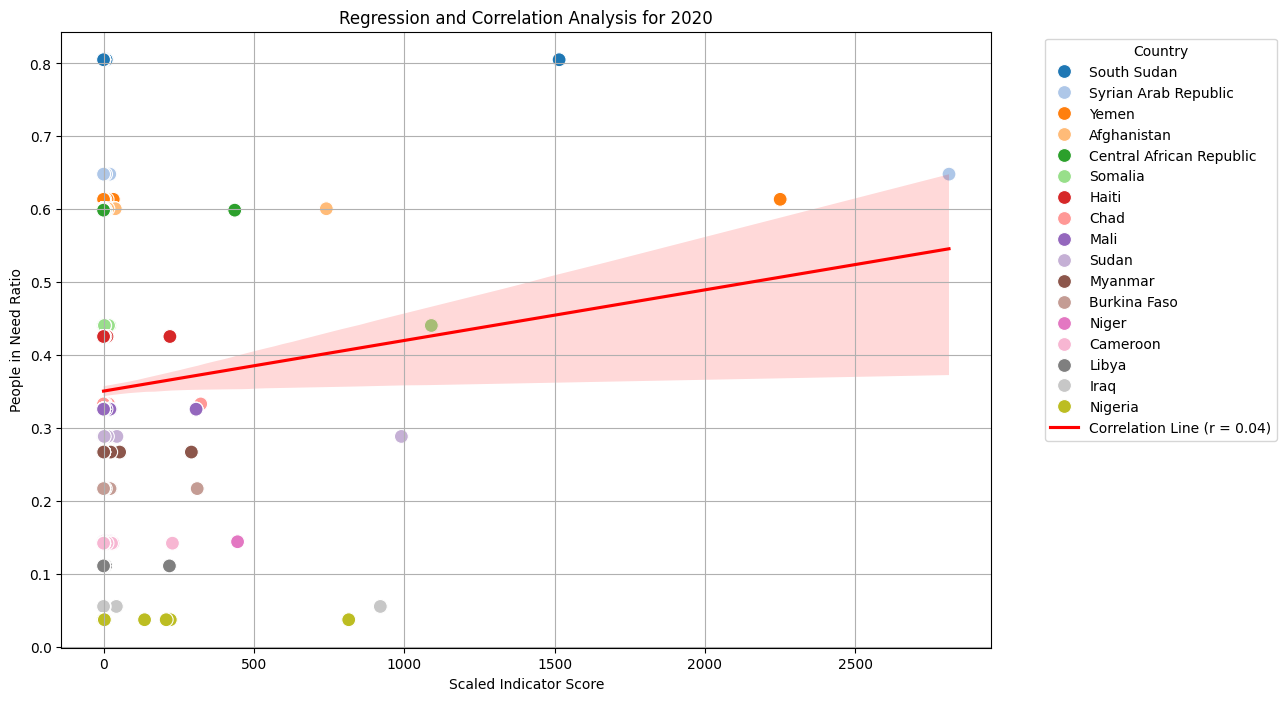

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_2020,
    x='IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

# Add the regression line
sns.regplot(
    data=cleaned_data_2020,
    x='IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label=f'Correlation Line (r = {pearson_corr_2020:.2f})'
)

# Customize the plot
plt.xlabel('Scaled Indicator Score')
plt.ylabel('People in Need Ratio')
plt.title('Regression and Correlation Analysis for 2020 YEAR 2')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     3.741
Date:                  Mon, 10 Feb 2025   Prob (F-statistic):             0.0532
Time:                          17:24:28   Log-Likelihood:                 207.66
No. Observations:                  2100   AIC:                            -411.3
Df Residuals:                      2098   BIC:                            -400.0
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

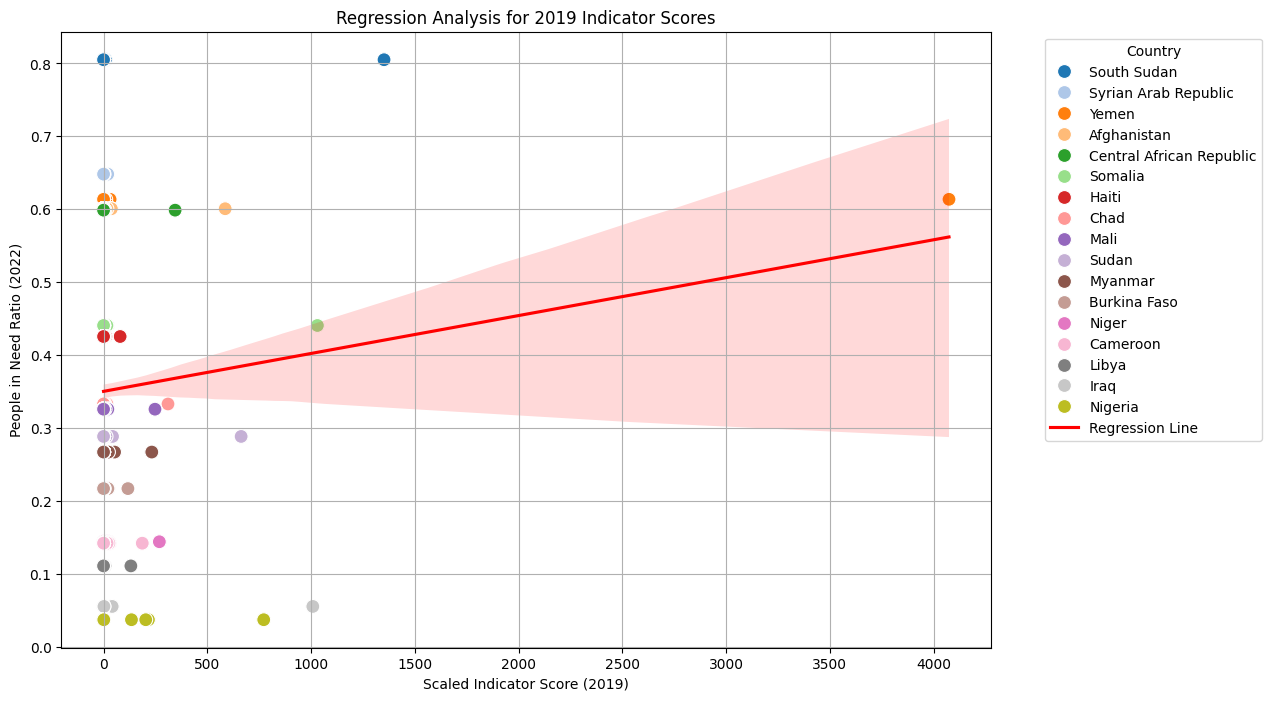

In [60]:
# Filter data for the year 2019
inform_data_2019 = inform_data_updated[inform_data_updated['SurveyYear'] == 2019]

# Merge 2019 INFORM data with 2022 People in Need ratio
merged_data_2019 = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2019[['Country', 'IndicatorScore']],
    on='Country',
    how='inner'
)

# Scale the indicator score and clean the data
merged_data_2019['IndicatorScore_Scaled'] = merged_data_2019['IndicatorScore'] / 1e6
cleaned_data_2019 = merged_data_2019.replace([np.inf, -np.inf], np.nan).dropna()

# Regression analysis
X = sm.add_constant(cleaned_data_2019['IndicatorScore_Scaled'])
y = cleaned_data_2019['People_in_Need_Ratio']
model_2019 = sm.OLS(y, X).fit()
regression_summary_2019 = model_2019.summary()

# Display regression summary
print(regression_summary_2019)

# Correlation analysis
# Pearson correlation
pearson_corr_2019, pearson_p_value_2019 = pearsonr(
    cleaned_data_2019['IndicatorScore_Scaled'],
    cleaned_data_2019['People_in_Need_Ratio']
)

# Spearman correlation
spearman_corr_2019, spearman_p_value_2019 = spearmanr(
    cleaned_data_2019['IndicatorScore_Scaled'],
    cleaned_data_2019['People_in_Need_Ratio']
)

# Print correlation results
print(f"Pearson Correlation (2019): {pearson_corr_2019:.4f}, P-value: {pearson_p_value_2019:.4f}")
print(f"Spearman Correlation (2019): {spearman_corr_2019:.4f}, P-value: {spearman_p_value_2019:.4f}")

# Generate a scatter plot for the regression analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_2019,
    x='IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

# Add the regression line
sns.regplot(
    data=cleaned_data_2019,
    x='IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label='Regression Line'
)

# Customize the plot
plt.xlabel('Scaled Indicator Score (2019)')
plt.ylabel('People in Need Ratio (2022)')
plt.title('Regression Analysis for 2019 Indicator Scores')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



                             OLS Regression Results                             
Dep. Variable:     People_in_Need_Ratio   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     1.361
Date:                  Mon, 10 Feb 2025   Prob (F-statistic):              0.244
Time:                          17:28:37   Log-Likelihood:                 215.71
No. Observations:                  2252   AIC:                            -427.4
Df Residuals:                      2250   BIC:                            -416.0
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

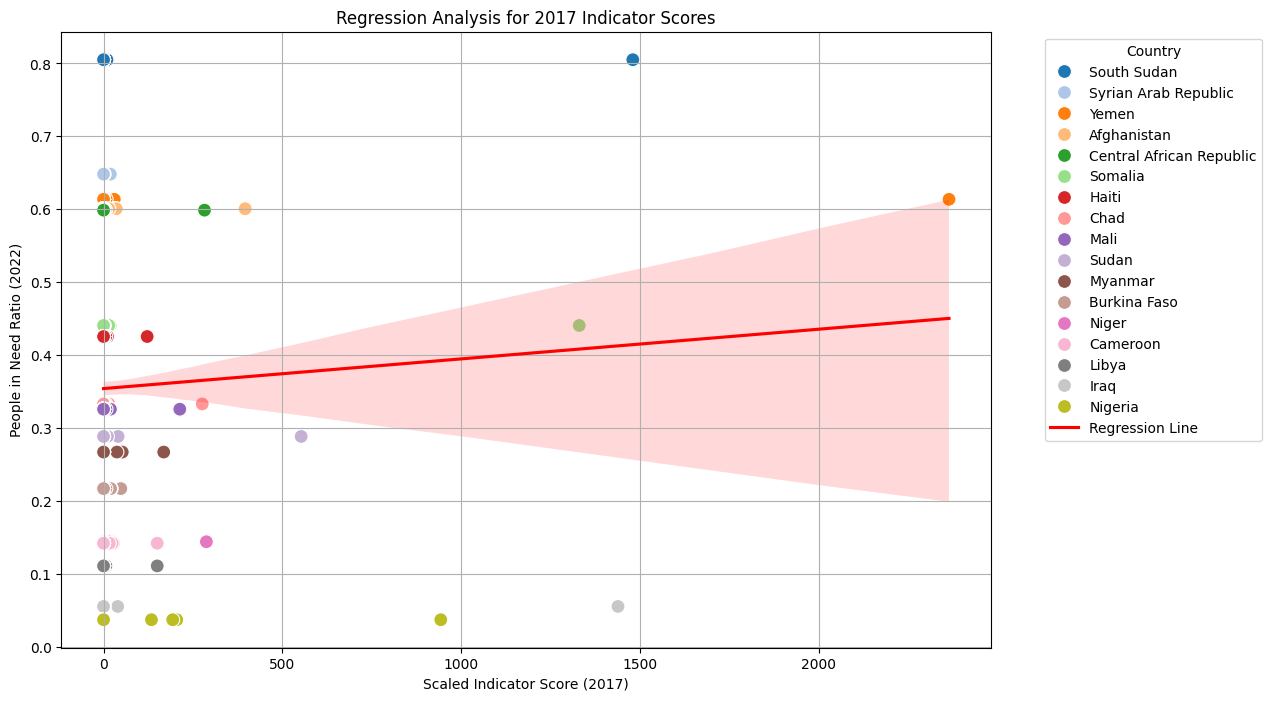

In [61]:
# Filter data for the year 2017
inform_data_2017 = inform_data_updated[inform_data_updated['SurveyYear'] == 2017]

# Merge 2017 INFORM data with 2022 People in Need ratio
merged_data_2017 = pd.merge(
    people_in_need_ratio_2022[['Country', 'People_in_Need_Ratio']],
    inform_data_2017[['Country', 'IndicatorScore']],
    on='Country',
    how='inner'
)

# Scale the indicator score and clean the data
merged_data_2017['IndicatorScore_Scaled'] = merged_data_2017['IndicatorScore'] / 1e6
cleaned_data_2017 = merged_data_2017.replace([np.inf, -np.inf], np.nan).dropna()

# Regression analysis
X = sm.add_constant(cleaned_data_2017['IndicatorScore_Scaled'])
y = cleaned_data_2017['People_in_Need_Ratio']
model_2017 = sm.OLS(y, X).fit()
regression_summary_2017 = model_2017.summary()

# Display regression summary
print(regression_summary_2017)

# Correlation analysis
# Pearson correlation
pearson_corr_2017, pearson_p_value_2017 = pearsonr(
    cleaned_data_2017['IndicatorScore_Scaled'],
    cleaned_data_2017['People_in_Need_Ratio']
)

# Spearman correlation
spearman_corr_2017, spearman_p_value_2017 = spearmanr(
    cleaned_data_2017['IndicatorScore_Scaled'],
    cleaned_data_2017['People_in_Need_Ratio']
)

# Print correlation results
print(f"Pearson Correlation (2017): {pearson_corr_2017:.4f}, P-value: {pearson_p_value_2017:.4f}")
print(f"Spearman Correlation (2017): {spearman_corr_2017:.4f}, P-value: {spearman_p_value_2017:.4f}")

# Generate a scatter plot for the regression analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cleaned_data_2017,
    x='IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    hue='Country',
    palette='tab20',
    s=100,
    legend='brief'
)

# Add the regression line
sns.regplot(
    data=cleaned_data_2017,
    x='IndicatorScore_Scaled',
    y='People_in_Need_Ratio',
    scatter=False,
    color='red',
    label='Regression Line'
)

# Customize the plot
plt.xlabel('Scaled Indicator Score (2017)')
plt.ylabel('People in Need Ratio (2022)')
plt.title('Regression Analysis for 2017 Indicator Scores')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

